##### <h1 id="aa" align="center"> PREDICTION OF BANK CUSTOMER CHURN </h1> 


Description of each variable:
<ul>
<li>Credit_score — credit rating </li>
<li>geography — client country</li>
<li>gender — client gender</li>
<li>age — client age</li>
<li>tenure — number of years spent by the client with the bank </li>
<li>balance — client account balance</li>
<li>num_of_product — number of products that the client purchased from the bank</li>
<li>has_cr_card — the client has a credit card</li>
<li>is-_active_member — active client </li>
<li>estimated_salary — clien salary</li>
<li>exited — client left the bank </li>    
</ul>

In [81]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt   #plt.xkcd()
from IPython.display import set_matplotlib_formats
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder
from utilities import *

In [50]:
# Improve quality of the plots
set_matplotlib_formats('svg')
# Set the style of the plot
plt.style.use('seaborn-v0_8-white')
#plt.xkcd()

## Load and clean the data

In [26]:
# Load the data
df = pd.read_csv("Churn Modeling.csv", index_col=False)
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* At least 3 columns do not provide training value : RowNumber, CustomerId and Surname


In [27]:
col_name = ['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 
            'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']

In [28]:
# Remove unnecessary variables
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
# Change the columns name
df.columns = col_name
# Show the data
df.head(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* The set contains information about 10,000 bank users

* No empty values found

* There are both nominative and quantitative characteristics

In [9]:
# Number of unique value for each variable
df.nunique()

credit_score         460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
num_of_products        4
has_cr_card            2
is_active_member       2
estimated_salary    9999
exited                 2
dtype: int64

## Statistics and data visualisation

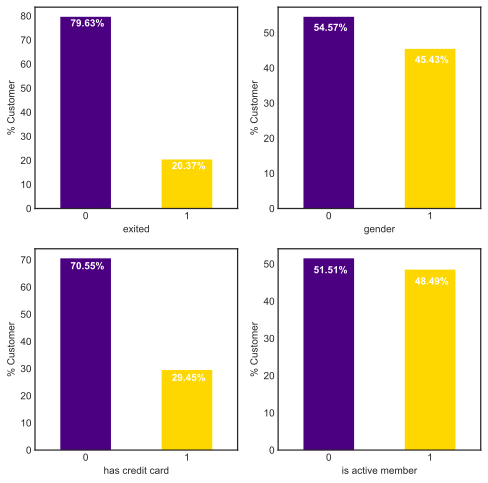

In [10]:
plt.figure(figsize=(8, 8))
# Plot the distribution exited
plt.subplot(2, 2, 1)
x = (df["exited"].value_counts(normalize=True)*100).plot(kind = 'bar', 
                                                     color = ['indigo', 'gold'])
x.set_ylabel('% Customer')
x.set_xlabel('exited')
#x.set_title('Distribution of exited')
plt.xticks([0, 1], ['0', '1'], rotation=0) 
for i in x.patches:
    x.text(i.get_x()+.10, i.get_height()-4.0, \
            f'{round((i.get_height()), 2)}%',
            fontsize=10,
            color='white',
           weight = 'bold')

# Plot the distribution of gender
plt.subplot(2, 2, 2)
x = (df["gender"].value_counts(normalize=True)*100).plot(kind = 'bar', 
                                                     color = ['indigo', 'gold'])
x.set_ylabel('% Customer')
x.set_xlabel('gender')
#x.set_title('Distribution of gender')
plt.xticks([0, 1], ['0', '1'], rotation=0) 
for i in x.patches:
    x.text(i.get_x()+.10, i.get_height()-4.0, \
            f'{round((i.get_height()), 2)}%',
            fontsize=10,
            color='white',
           weight = 'bold')

# Plot the distribution of has credit card
plt.subplot(2, 2, 3)
x = (df["has_cr_card"].value_counts(normalize=True)*100).plot(kind = 'bar', 
                                                     color = ['indigo', 'gold'])
x.set_ylabel('% Customer')
x.set_xlabel('has credit card')
plt.xticks([0, 1], ['0', '1'], rotation=0) 
for i in x.patches:
    x.text(i.get_x()+.10, i.get_height()-4.0, \
            f'{round((i.get_height()), 2)}%',
            fontsize=10,
            color='white',
           weight = 'bold')

# Plot the distribution of is active member
plt.subplot(2, 2, 4)
x = (df["is_active_member"].value_counts(normalize=True)*100).plot(kind = 'bar', 
                                                     color = ['indigo', 'gold'])
x.set_ylabel('% Customer')
x.set_xlabel('is active member')
plt.xticks([0, 1], ['0', '1'], rotation=0) 
for i in x.patches:
    x.text(i.get_x()+.10, i.get_height()-4.0, \
            f'{round((i.get_height()), 2)}%',
            fontsize=10,
            color='white',
           weight = 'bold')

In [77]:
list(df["geography"].value_counts(normalize=True).keys())

['France', 'Germany', 'Spain']

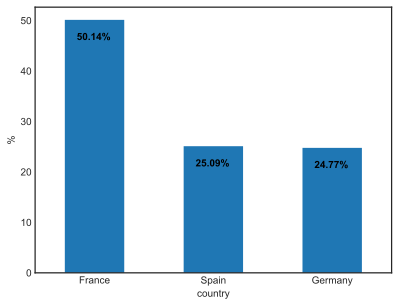

In [82]:
# x = (df["geography"].value_counts(normalize=True)*100).plot(kind = 'bar', 
#                                                      color = None)
# x.set_ylabel('% Customer')
# x.set_xlabel('exited')
# #x.set_title('Distribution of exited')
# plt.xticks([0, 1, 2], ['france', 'maroc', "belgique"], rotation=0) 
# for i in x.patches:
#     x.text(i.get_x()+.10, i.get_height()-4.0, \
#             f'{round((i.get_height()), 2)}%',
#             fontsize=10,
#             color='black')


bar_plot(df["geography"], x_label="country", y_label="%")

* Gender and activities among customers are evenly distributed.
* The proportion of customers holding a credit card is lower.
* The proportion of exiting customers is low.

In [11]:
# Label Encoding
le = LabelEncoder()
var_le = ['geography', 'gender']
for i in var_le :
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique())) 

geography  :  [0 2 1]  =  ['France' 'Spain' 'Germany']
gender  :  [0 1]  =  ['Female' 'Male']


[Text(0.5, 1.0, 'Boxplot of age by exited')]

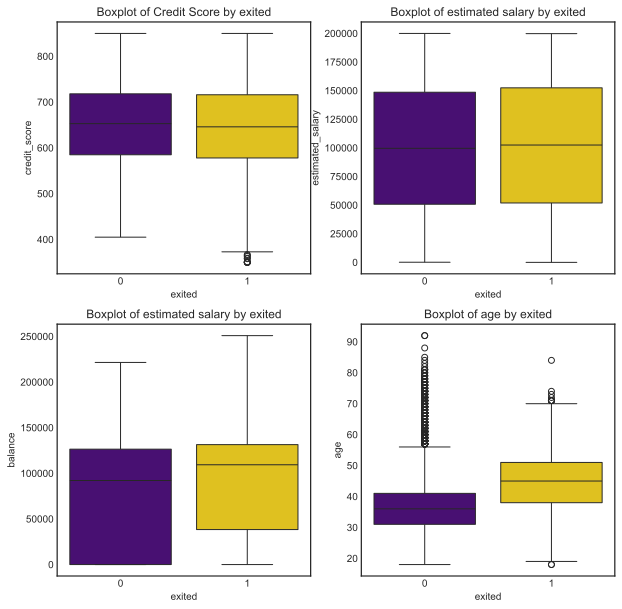

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
# Boxplot of Credit Score by exited
sns.boxplot(x = df['exited'], y = df['credit_score'], palette=['indigo', 'gold'])\
                                                    .set(title="Boxplot of Credit Score by exited")
# Boxplot of estimated salary by exited
plt.subplot(2, 2, 2)
sns.boxplot(x = df['exited'], y = df['estimated_salary'], palette=['indigo', 'gold'])\
                                                    .set(title="Boxplot of estimated salary by exited")
# Boxplot of balance by exited
plt.subplot(2, 2, 3)
sns.boxplot(x = df['exited'], y = df['balance'], palette=['indigo', 'gold'])\
                                                    .set(title="Boxplot of estimated salary by exited")
# Boxplot of age by exited
plt.subplot(2, 2, 4)
sns.boxplot(x = df['exited'], y = df['age'], palette=['indigo', 'gold'])\
                                                    .set(title="Boxplot of age by exited")

In [13]:
# Summary of numerical variables
numeric_col = ['estimated_salary', 'balance', 'credit_score','age']
df[numeric_col].describe()

,estimated_salary,balance,credit_score,age
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,100090.239881,76485.889288,650.528800,38.921800
std,57510.492818,62397.405202,96.653299,10.487806
min,11.580000,0.000000,350.000000,18.000000
25%,51002.110000,0.000000,584.000000,32.000000
50%,100193.915000,97198.540000,652.000000,37.000000
75%,149388.247500,127644.240000,718.000000,44.000000
max,199992.480000,250898.090000,850.000000,92.000000


In [14]:
ex_cr = df.groupby('exited')['credit_score'].mean().reset_index()
ex_age = df.groupby('exited')['age'].mean().reset_index()
merge_1 = pd.merge(ex_cr, ex_age, on='exited')
ex_salary = df.groupby('exited')['estimated_salary'].mean().reset_index()
merge_2 = pd.merge(merge_1, ex_salary, on='exited')
ex_balance = df.groupby('exited')['estimated_salary'].mean().reset_index()
pd.merge(merge_2, ex_balance, on='exited')

,exited,credit_score,age,estimated_salary_x,estimated_salary_y
0,0,651.853196,37.408389,99738.391772,99738.391772
1,1,645.351497,44.837997,101465.677531,101465.677531


Text(0.5, 1.0, 'Correlation Plot')

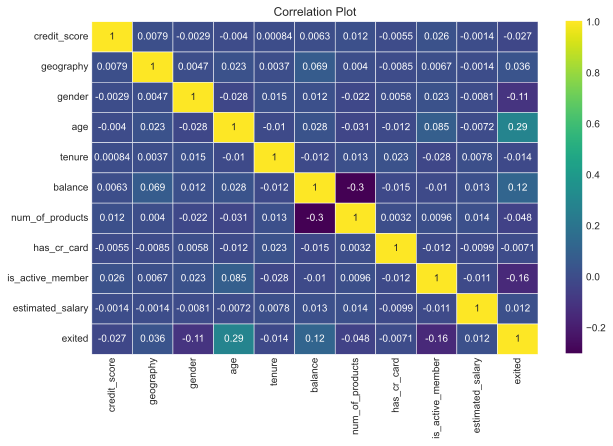

In [15]:
# Correlation between numrical variable
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Plot')

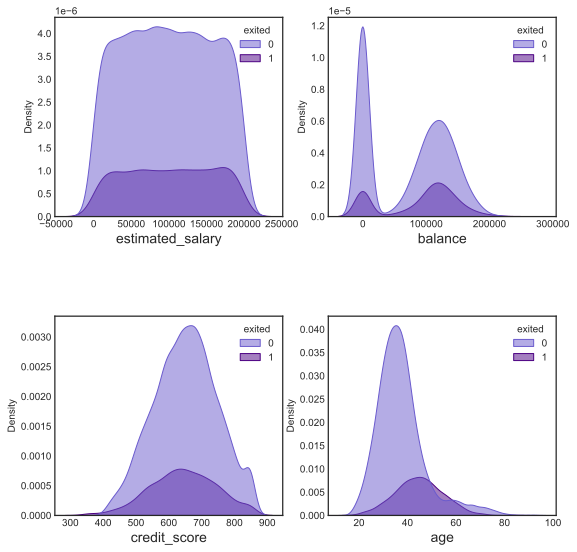

In [16]:
fig, axes = plt.subplots(2,2, figsize = (9,9))
plt.subplots_adjust(hspace=0.5)
columns = df[numeric_col]
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.5,
                hue = 'exited',
                palette = ['#6A5ACD', '#4B0082'],
                ax = ax)
    ax.set_xlabel(column, fontsize = 14)
plt.show()

In [17]:
df.head(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


* Given the distributions above, we observe that the distribution changes when clients exit or stay.
* We observe a heavy tail in the distributions, which implies higher probabilities for the extreme values.
* Clients over 70 and below 20 have a higher chance of not exiting..

Formulas test :

$$
\mathbb{P}(X \ge 3) = \int_3^{\infty} \frac{1}{\sigma\sqrt(2 \pi)}e^{(\frac{x-\mu}{\sigma})^2} dx
$$

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

$\mathbb{E}[X]=\mu$

$VaR_{\alpha}(X) = \sigma\Phi^{-1}(\alpha)+\mu$

In [18]:
# width = 0.25
# plt.bar(x_indexes - width, z, label="z", color = 'blue', width=width)
# plt.bar(x_indexes, y, label="y", color = 'red', width=width)
# plt.xticks(ticks=x_indexes, labels=x)
# plt.title("Text for title")
# plt.xlabel("Age")
# plt.ylabel("salary")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()